# Keller-Segel Equation 1D

# Case 2: 

We try to approximate the solution of
\begin{align}
\partial_t u - \nu \partial^2_{xx} u + \beta \partial_{x} u &= f \quad\text{in } \Omega=(a,b) \times (0,T),
\\
\partial_t u \cdot n &= 0\quad\text{on } \partial\Omega,
\end{align}
where $(a,b)\subset\mathbb{R}$ is an interval, $T>0$ is a given final time and $f\in C([a,b] \times (0,T))$.

We are going to consider $\beta = (\beta_0, \beta_1, \ldots, \beta_n)=v$.

Let us consider the mesh $x_i=a+h i$, for  $i=0,...,n+1$, with $h=(b-a)/(n+2)$, and the time partition $t_m = km$, $m=0,...,M$ whith $k=T/M$.

We define the problem: given $u_{i,j}^{m-1}$, $m\ge 1$, find $u_{i}^m \simeq u(x_i, t_m)$ such that

$$
\frac 1 k u_{i}^m 
- \nu \frac{ u_{i+1}^m - 2u_{i}^m + u_{i-1}^m}{h^2} + \frac{\beta_{i+1}^m u_{i+1}^m - \beta_i^m u_i^m}{h}
=
f^m_{i} + \frac 1 k u_{i}^{m-1},
$$
or
$$
\Big(\frac 1 k + \frac{2\nu}{h^2} - \frac{\beta_i^m}{h} \Big) u_{i}^m 
- \Big( \frac{\nu}{h^2} - \frac{\beta_{i+1}^m }{h} \Big) u_{i+1}^m
- \frac{\nu}{h^2} u_{i-1}^m
=
f^m_{i} + \frac 1 k u_{i}^{m-1},
$$
or
$$
\Big(1+ 2 \frac {k\nu}{h^2} - \beta_i^m
\frac{k}{h} \Big) u_{i}^m 
- \Big( \frac {k\nu}{h^2} - \beta_{i+1}^m \frac{k}{h} \Big) u_{i+1}^m
- \frac {k\nu}{h^2} \, u_{i-1}^m
=
k f^m_{i} + u_{i}^{m-1},
$$

It can be written as the system
$AU=F$ with 

\begin{aligned}
U=( u^m_{1},u^m_{2},...,u^m_{n}),
\\
F_{i}=k f^m_{i} + u_{i}^{m-1}
\end{aligned}
and
$$
A=
\begin{pmatrix}
   a & -b &  0 &  0 & \dots & & & 0 & 0 \\
  -c &  a & -b &  0 & \dots & & & 0 & 0\\
   0 & -c &  a & -b & \dots & & & 0 & 0 \\
   \vdots &    & \ddots & \ddots & \ddots & \\
   0 & 0 & \dots & -c & a  & -b \\
   0 & 0 &  0 & \dots & -c & a  & -b \\
     & & &&    & \ddots & \ddots & \ddots & \\
   0 & \dots & &  & & & 0 & a & -b \\ 
   0 & \dots & &  & & &  & -c & a \\
 \end{pmatrix},
$$
siendo:
\begin{align*}
  a&= 1 + 2\frac {k\nu}{h^2} - \beta_i^m \frac{k}{h}, \\
  b&=\frac {k\nu}{h^2} - \beta_{i+1}^m \frac{k}{h}, \\
  c&=\frac {k\nu}{h^2}.
\end{align*}
El vector diagonal $(d,d,\dots,d)$ está separado exactamente $n$
posiciones desde la diagonal de la matriz.


#### Boundary conditions

Let $\Gamma_l=\{a\}$, $\Gamma_r=\{b\}$. Homogeneous Neumann b.c. can be approximated as follows:

* On $\Gamma_l$: $\partial_x u(a,t_m) \cdot n = \partial_x u(a,t_m) \cdot (-1) = -\partial_x   u(a,t_m) \simeq -\frac{u^m_{1}-u^m_{0}}{h}=0$,
* On $\Gamma_r$: $\nabla u(b,y_j,t_m) \times n = \nabla u(b,y_j,t_m) \times (1,0) = \partial_x   u(b,y_j,t_m) \simeq \frac{u^m_{n+1,j}-u^m_{n,j}}{h}=0$,

Then, boundary conditions can be approximated by defining, for each $m\ge 1$, the values $u^m_{0,j}=u^m_{1,j}$, $u^m_{n+1,j}=u^m_{n,j}$, $u^m_{i,0}=u^m_{i,1}$, $u^m_{i,n+1}=u^m_{i,n}$, $i,j=0,\dots,n+1$

In [1]:
import numpy as np
import math
import matplotlib.pyplot as mpl
from numpy import diag, ones, linspace, array, reshape
from numpy.linalg import solve

In [2]:
def convection_diffusion_equation_neumann_1d(f, U0, v, k, h, t_act, x, nx_intervals, nt_intervals, 
                             a, b, T, nu, verbosity):
    """
    Heat equatin with Homogeneous Neumann Boundary Conditions.
    * f: RHS
    * u_init: Initial function, u_init(x)
    * nu: Viscosity coefficient
    * a, b: interval (domain = (a,b))
    * T: Max. time (time interval = (0,T))
    * nx: space discretization, a=x_0,x_1,...,x_{nx}=b$
    * nt: time discretization, 0=t_0,t_1,...,t_{nt}=T$
    * v: vector with convective coefficient
    """
    
    # Space and time discretization
    nx_points = nx = nx_intervals+1
    #h = (b-a)/nx_intervals # Space mesh size
    #x = linspace(a, b, nx_points) # a = x_0, ..., x_{nx} = b
    
    #k = T/nt_intervals # Time step
    #t = linspace(0, T, nt_intervals+1) # 0 = t_0, t_1, ..., t_{nt} = T  

    #if(verbosity>1):
    #    print("x=",x)
    #    print("t=",t)
    
    c0 = k/h  # Diagonal coefficient a_{ii}
    c01 = 1 + 2*k*nu/h**2
    c1 = k/h        # -c1 are the extra-diagonal coefficients
    c11 = k*nu/h**2
    c2 = k*nu/h**2
    
    # Matrix
    n=nx  # n_interior_x_points*n_interior_x_points
    w = ones(NX)
    for i in range(1,NX+1):
        w[i-1]=v[i]  
    
    vec0 = v
    vec01 = ones(n)
    vec1 = w
    vec2 = ones(n-1)
    
    A = c0 * diag( vec0 ) + c01 * diag(vec01) \
            - c1 * diag( vec1, +1 ) - c11 * diag( vec2, +1) \
            - c2 * diag( vec2, -1 )

    # Set Neumann boundary c.
    A[0,0] = A[-1,-1] = 1
    A[0,1] = A[-1,-2] = -1
    
    if(verbosity>0): 
        print("nx=%i (h=%2.2f), nt=%i (k=%2.2f), n=(nx+1)^2=%i" % 
              (nx, h, nt_intervals, k, n) )
        print("A=\n", A, " ", end="" )
        print( np.shape(A) )
    
    # Time iterations)
   
    #U0 = u_init(x)
    #if(verbosity>0):        
    #    print("U0 =", U0, " ", np.shape(U0) )    
    #solution = [ U0 ]

    #for m in range(1,nt_intervals+1):  # m=1, 1,..., nt
    #   current_t = t[m]
    #    if(verbosity>0):
    #        print("m=%i, current_t=%.2f" % (m,current_t))
        
    F = k*f(x, t_act) + U0
        
        # Set homogneous Neumann boundary c.
    F[0] = F[-1] = 0
      
    if(verbosity>0):        
        print("F=", F, " ", end="" )
        print( np.shape(F) )

        # 3. Resolver sistema
    
    U = solve(A, F)
    if(verbosity>0):        
        print("U =", U, " ", np.shape(U) )
        from numpy import linalg as LA
        print("||U||_2 =", LA.norm(U))
        #U0 = U
        #solution.append(U)
        
    return U

In [3]:
def reaction_diffusion_equation_neumann_1d(f, U0, v, k, h, t_act, x, nx_intervals, nt_intervals, 
                             a, b, T, nu, verbosity, k1, k2):
    """
    Heat equatin with Homogeneous Neumann Boundary Conditions.
    * f: RHS
    * u_init: Initial function, u_init(x)
    * nu: Viscosity coefficient
    * a, b: interval (domain = (a,b))
    * T: Max. time (time interval = (0,T))
    * nx: space discretization, a=x_0,x_1,...,x_{nx}=b$
    * nt: time discretization, 0=t_0,t_1,...,t_{nt}=T$
    * k1: Death coefficient (reaction)
    * k2: Growth coefficient (reaction) 
    * v: Concentration of the other equation
    """
    
    # Space and time discretization
    nx_points = nx = nx_intervals+1
    #h = (b-a)/nx_intervals # Space mesh size
    #x = linspace(a, b, nx_points) # a = x_0, ..., x_{nx} = b
    
    #k = T/nt_intervals # Time step
    #t = linspace(0, T, nt_intervals+1) # 0 = t_0, t_1, ..., t_{nt} = T  

    #if(verbosity>1):
    #    print("x=",x)
    #    print("t=",t)
    
    c0 = 1 + 2*(k*nu)/h**2-k*k1  # Diagonal coefficient a_{ii}
    c1 = k*nu/h**2          # -c1 are the extra-diagonal coefficients
    
    # Matrix
    n=nx  # n_interior_x_points*n_interior_x_points
    ones0 = ones(n)
    ones1 = ones(n-1)
    A = c0 * diag( ones0 ) \
            - c1 * diag( ones1, +1 ) \
            - c1 * diag( ones1, -1 )

    # Set Neumann boundary c.
    A[0,0] = A[-1,-1] = 1
    A[0,1] = A[-1,-2] = -1
    
    if(verbosity>0): 
        print("nx=%i (h=%2.2f), nt=%i (k=%2.2f), n=(nx+1)^2=%i" % 
              (nx, h, nt_intervals, k, n) )
        print("A=\n", A, " ", end="" )
        print( np.shape(A) )
    
    # Time iterations)
   
    #U0 = u_init(x)
    #if(verbosity>0):        
    #    print("U0 =", U0, " ", np.shape(U0) )    
    #solution = [ U0 ]

    #for m in range(1,nt_intervals+1):  # m=1, 1,..., nt
    #    current_t = t[m]
    #    if(verbosity>0):
    #        print("m=%i, current_t=%.2f" % (m,current_t))
        
    F = k*f(x, t_act) + U0 - k*k2*v
        
        # Set homogneous Neumann boundary c.
    F[0] = F[-1] = 0
      
    if(verbosity>0):        
        print("F=", F, " ", end="" )
        print( np.shape(F) )

        # 3. Resolver sistema
    
    U = solve(A, F)
    if(verbosity>0):        
        print("U =", U, " ", np.shape(U) )
        from numpy import linalg as LA
        print("||U||_2 =", LA.norm(U))
    #U0 = U
    #solution.append(U)
        
    return U

In [5]:
def ks_progres_1d(f, u_init, v_init, nx_intervals=10, nt_intervals=2, a=0, b=1, T=1, nu=1, verbosity=0, k1=1, k2=1):
    
    """
    Heat equatin with Homogeneous Neumann Boundary Conditions.
    * f: RHS
    * u_init: Initial function, u_init(x)
    * nu: Viscosity coefficient
    * a, b: interval (domain = (a,b))
    * T: Max. time (time interval = (0,T))
    * nx: space discretization, a=x_0,x_1,...,x_{nx}=b$
    * nt: time discretization, 0=t_0,t_1,...,t_{nt}=T$
    * k1: Death coefficient (reaction)
    * k2: Growth coefficient (reaction) 
    * v: Concentration of the other equation. Now it has no importance. We assume that is a constant
    """
    
    nx_points = nx_intervals+1
    h = (b-a)/nx_intervals
    x = linspace(a, b, nx_points)
    k = T/nt_intervals
    t = linspace(0, T, nt_intervals+1)
    # def u0(x):return exp(-coef*(x-(a+b)/2)) # Cambiar función
    # def v0(x): return exp(-coef*(x-(a+b)/2))
    # V=zeros(n+1)
    # V0=zeros(n+1)
    # U=zeros(n+1)
    # U0=zeros(n+1)

    V0 = v_init(x)
    U0 = u_init(x)
    
    if(verbosity>0):
        print("U0 =", U0, " ", np.shape(U0) )

    # for i in range(0, n+1):
    #    v1[i]=v0(x[i])

    # for i in range(0, n+1):
    #    u1[i]=u0(x[i])

    # listu=[U0]
    # listv=[V0]
    
    solution_U = [ U0 ]
    solution_V = [ V0 ]

    for j in range(0, nt_intervals+1):
        V = reaction_diffusion_equation_neumann_1d(f, V0, U0, k, h, t[j], x, nx_intervals, nt_intervals, a, b, T, nu, verbosity, k1, k2)
        if(verbosity>0):
            print("V=", V, " ", np.shape(V))
        # listv.extend([V])
        U = convection_diffusion_equation_neumann_1d(f, U0, V, k, h, t[j], x, nx_intervals, nt_intervals, a, b, T, nu, verbosity)
        if(verbosity>0):
            print("U=", U, " ", np.shape(U))
        # listu.extend([U])
        U0=U
        V0=V
        solution_U.append(U)        
        solution_V.append(V)

        # U=zeros(n+1)
        # V=zeros(n+1)
    return x, solution_U, solution_V

Define plotting function, RHS function f and initial condition

We provide two initial conditions for testing:
1. $u_0(x) = C$ (constant). The exact solution is $u(x,t)=u_0$ for all $t>0$.
2. $u_0(x) \ge 0$ is defined as a Gaussian (bell) function. Like for any initial condition, the function must converge (in $L^2$ norm) to a constant, $C_\infty\ge 0$, when $t\to\infty$. Specifically, it is not diffcult to show that
$
\| u(t) - u_0 \|_{L^2(\Omega)} \to 0
$
as $t\to\infty$, where $u_\infty$ is the mean oif $u$ in $\Omega$, i.e.
$$
u_\infty= \frac 1{|\Omega|} \int_\Omega u_0(x) dx \in\mathbb R
$$
where $|\Omega|$ is the meassure of $\Omega$.

In [12]:
def my_plot(x, y, t_iter):
    d = t_iter
    l = "$u(x,t_i),\quad i=%i$" % (t_iter)
    mpl.plot(x, y, lw=2, dashes=(5, d), label=l)
    
mpl.rcParams['figure.dpi'] = 100

# --------------------------------------------    
f = lambda x, t: np.zeros_like(x)

# Initial solution 1: u_0=cte (then u(x,t)=cte forall t>0)
u_cte = lambda x: 5*np.ones_like(x)

# Initial solution 2: u_0 = Gaussian function
C_gauss = 10
u_gauss = lambda x: np.exp(-C_gauss*(x**2))
C_gauss = 20
v_gauss = lambda x: np.exp(-C_gauss*(x**2))

In [13]:
NT = 2
NX = 10
X0 = -1
X1 = 1
x, u, v = ks_progres_1d(f, u_init=u_gauss, v_init=v_gauss, 
                                    nx_intervals=NX, nt_intervals=NT, 
                                    a=X0, b=X1, T=1)

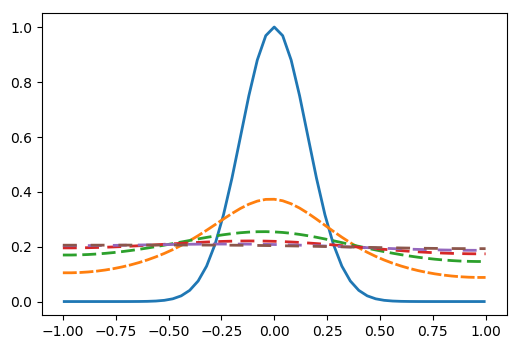

In [14]:
NT = 6
NX = 50
X0 = -1
X1 = 1
x, u, v = ks_progres_1d(f, u_init=u_gauss, v_init=v_gauss, 
                                    nx_intervals=NX, nt_intervals=NT, 
                                    a=X0, b=X1, T=1, verbosity=0)

for i in range(NT):
    my_plot(x, u[i], i)
    #mpl.show()
#u_infty = quad(u[0], x)/(X1-X0) # Media de u_0 en [a,b]
#mpl.plot(x, u_infty*np.ones_like(x), "-.", label="$u_\infty$")
#mpl.grid()    
#mpl.legend()

### Compruebo que $\|u(i)-u_\infty\| \to 0$

In [89]:
def quad(y, x):
    """
    Fórmula de cuadratura de los trapecios compuesta para aproximar la integral
    de la función dada por los valores y_0, y_1, ..., y_{n-1} sobre los 
    nodos x_0, x_1,... x_{n-1}
    """
    h = x[1]-x[0]
    sum = np.sum(y[1:-2]) # f(x_1) + ... + f(x_{n-2})
    return h*( y[0]/2 + sum + y[-1]/2 )

# Test: integral de f(x)=1
valores_y = np.ones_like(x) # Array [1,1,1....1] (del tamaño de x)
integral_aprox = quad(valores_y, x )

print(" Intervalo [%.2f,%.2f], aproximación de la integral de f(x)=1:  %f" 
     % (x[0], x[-1], integral_aprox))

 Intervalo [-1.00,1.00], aproximación de la integral de f(x)=1:  1.960000


In [90]:
a, b = X0, X1
u_infty = quad(u[0], x)/(b-a) # Media de u_0 en [a,b] 

print("Mean of u_infty: %.16f" % (u_infty) )
errores_L2 = []
for i in range(0,NT):
    error_L2_cuadrado = quad( (u[i]-u_infty)**2, x)
    error_L2 = np.sqrt( error_L2_cuadrado )
    print ("||u(t_%i) - u_infty|| =  %.16f " % (i, error_L2) )
    errores_L2.append( error_L2 )
    
mpl.plot(range(NT), errores_L2, lw=3, label="||u(t_i) - u_infty||")
mpl.legend()
mpl.grid()

Mean of u_infty: 0.2802452818146038
||u(t_0) - u_infty|| =  0.4859180965609566 
||u(t_1) - u_infty|| =  0.3936081284289104 
||u(t_2) - u_infty|| =  0.3274962702323725 
||u(t_3) - u_infty|| =  0.2761433282471052 
||u(t_4) - u_infty|| =  0.2343811858294919 
||u(t_5) - u_infty|| =  0.1995846490933039 


In [68]:
f = lambda x, t: np.zeros_like(x)
x = linspace(-1, 1, 8)
t = linspace(0, 1, 8)
u_gauss = lambda x: np.exp(-C_gauss*(x**2))

In [69]:
f(x,t[3])

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [71]:
k=3
vec=k*f(x,t[3])
vec

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [72]:
U0=u_gauss(x)
U0

array([4.53999298e-05, 6.08431691e-03, 1.59336861e-01, 8.15395806e-01,
       8.15395806e-01, 1.59336861e-01, 6.08431691e-03, 4.53999298e-05])

In [73]:
w = U0 + vec
w

array([4.53999298e-05, 6.08431691e-03, 1.59336861e-01, 8.15395806e-01,
       8.15395806e-01, 1.59336861e-01, 6.08431691e-03, 4.53999298e-05])

In [75]:
v=U0
v

array([4.53999298e-05, 6.08431691e-03, 1.59336861e-01, 8.15395806e-01,
       8.15395806e-01, 1.59336861e-01, 6.08431691e-03, 4.53999298e-05])

In [77]:
k2=2

In [79]:
F = k*f(x, t[3]) + U0 - k*k2*v
F

array([-2.26999649e-04, -3.04215846e-02, -7.96684306e-01, -4.07697903e+00,
       -4.07697903e+00, -7.96684306e-01, -3.04215846e-02, -2.26999649e-04])